In [1]:
import numpy as np
import pandas as pd
import os
from os.path import join as jp
from warnings import warn

from tqdm import tqdm_notebook
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from logparser import *

In [2]:
data = convert_folder('./log_dir/')

0it [00:00, ?it/s]
0it [00:00, ?it/s]
22it [00:00, 2757.76it/s]
0it [00:00, ?it/s]
2it [00:00, 13.11it/s]t/s]
0it [00:00, ?it/s]
40it [00:00, 5012.91it/s]
0it [00:00, ?it/s]
13it [00:00, 1447.27it/s]
0it [00:00, ?it/s]C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:49: UserWarning: Possibly missing value in 47 line of file `./log_dir/data-2018-12-14-21.log` 
  warn("Possibly missing value in %s line of file `%s` " % (i+1, fp))
C:\Users\i344436\OneDrive - SAP SE\Git\eHome\logparser\logparser.py:49: UserWarning: Possibly missing value in 181 line of file `./log_dir/data-2018-12-14-21.log` 
  warn("Possibly missing value in %s line of file `%s` " % (i+1, fp))

5it [00:00, 15.30it/s]t/s]
0it [00:00, ?it/s]
223it [00:00, 11188.42it/s]
0it [00:00, ?it/s]
115it [00:00, 9620.35it/s]
0it [00:00, ?it/s]
8it [00:00, 17.14it/s]it/s]
0it [00:00, ?it/s]
343it [00:00, 24564.11it/s]
0it [00:00, ?it/s]
344it [00:00, 21557.78it/s]
0it [00:00, ?it/s]
11it [00:00, 19.45it/s]t/s]
0it [0

In [3]:
data = data.sort_values(by='DATE')

In [4]:
print('init shape: \t', data.shape)
df = data[~data.isnull().sum(axis=1).astype(bool).values].reset_index(drop=True).copy()
print('notnull shape: \t', df.shape)

init shape: 	 (29717, 6)
notnull shape: 	 (29714, 6)


In [5]:
df = df[df['DATE'] >= '2018-12-17']

In [6]:
df['MODE'] = df['MODE'].map({'on': 1, 'off': 0})

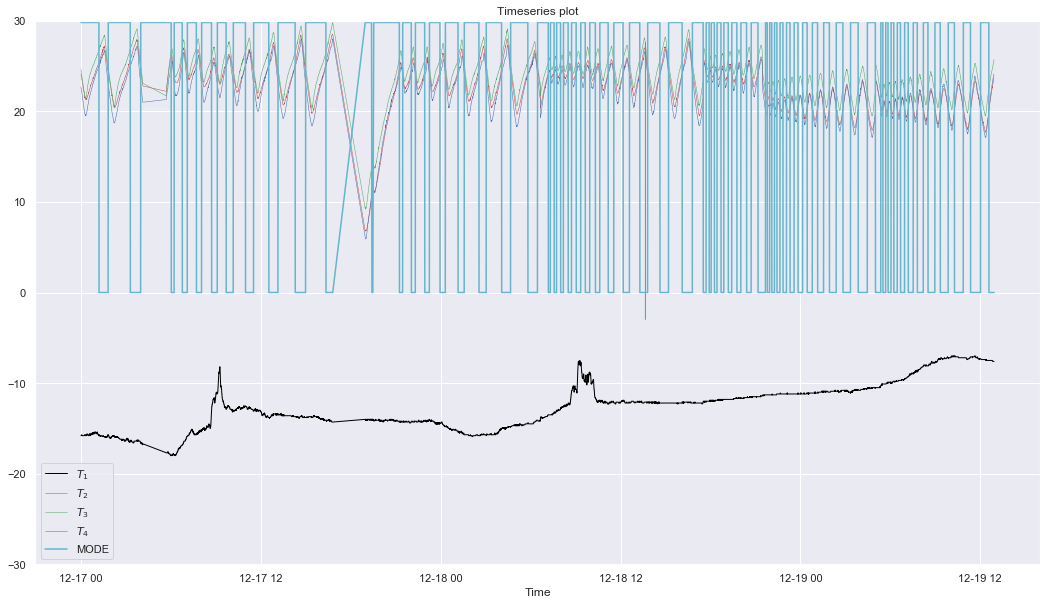

In [7]:
plt.figure(figsize=(18,10))
plt.title('Timeseries plot')
plt.plot(df['DATE'], df['T_1'], c='black', ls='-', lw=1, label='$T_1$')
plt.plot(df['DATE'], df['T_2'], 'r-', lw=0.5, label='$T_2$')
plt.plot(df['DATE'], df['T_3'], 'g-', lw=0.5, label='$T_3$')
plt.plot(df['DATE'], df['T_4'], 'b-', lw=0.5, label='$T_4$')
plt.plot(df['DATE'], df['MODE'] * df.max().values[1:].max(), 'c-', label='MODE')
plt.xlabel('Time')
plt.ylim((-30, 30))
plt.legend(loc='best')
plt.show()

In [11]:
df_part = df.iloc[-5500: -5000]

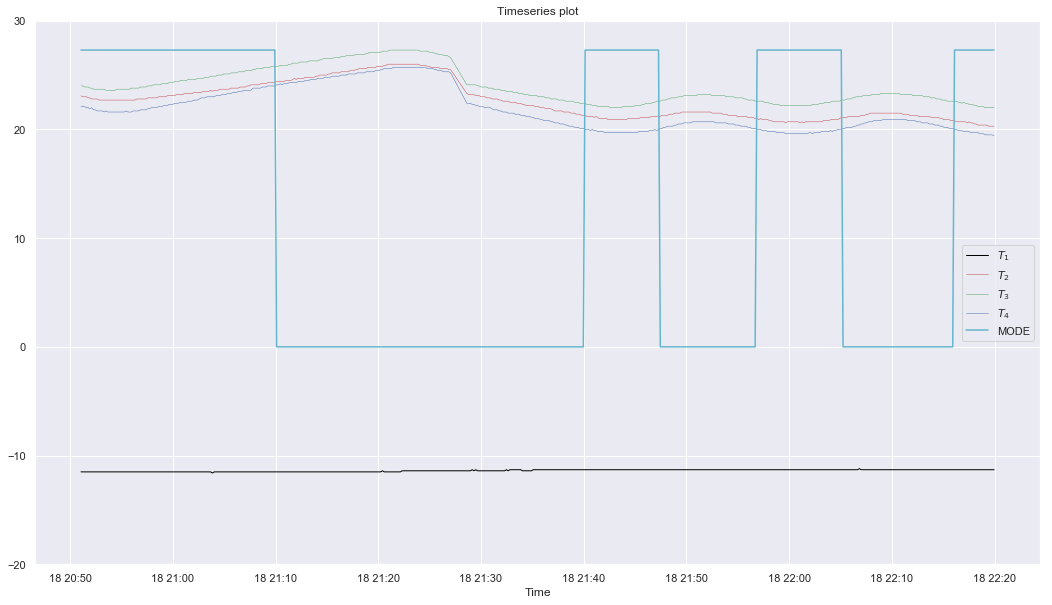

In [12]:
plt.figure(figsize=(18,10))
plt.title('Timeseries plot')
plt.plot(df_part['DATE'], df_part['T_1'], c='black', ls='-', lw=1, label='$T_1$')
plt.plot(df_part['DATE'], df_part['T_2'], 'r-', lw=0.5, label='$T_2$')
plt.plot(df_part['DATE'], df_part['T_3'], 'g-', lw=0.5, label='$T_3$')
plt.plot(df_part['DATE'], df_part['T_4'], 'b-', lw=0.5, label='$T_4$')
plt.plot(df_part['DATE'], df_part['MODE'] * df_part.max().values[1:].max(), 'c-', label='MODE')
plt.xlabel('Time')
plt.ylim((-20, 30))
plt.legend(loc='best')
plt.show()